### NER and knowledge graph

[nltk_data] Downloading package punkt to C:\Users\Gurram Bhavya
[nltk_data]     Reddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gurram Bhavya
[nltk_data]     Reddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words:
good: 558
product: 435
effective: 138
taking: 120
pain: 119
using: 105
quality: 101
medicine: 96
use: 95
stress: 95

Named Entities:
Thank You - PERSON
Ok Good - ORG
Nice - GPE
Nice - GPE
Nice Good - PERSON
Quality - ORG
Been - PRODUCT
2 weeks - DATE
WONDERFUL - PERSON
number one - CARDINAL
just a couple weeks ago - DATE
2 - CARDINAL
Excellent V - PRODUCT
Love - WORK_OF_ART
Good Product - PERSON
Ok Good Good - FAC
Kills - PERSON
Four - CARDINAL
Four - CARDINAL
2 - CARDINAL
every 6 months - DATE
2021 - DATE
6.1 - CARDINAL
6.4 - DATE
6.8 - CARDINAL
Gymnema - PERSON
about 6 - CARDINAL
staying home & feel - ORG
1st - ORDINAL
half - CARDINAL
1 - CARDINAL
GL - ORG
2 - CARDINAL
Brilliant Classy - PERSON
Terrific Brilliant Fabulous - ORG
2 - CARDINAL
3 - CARDINAL
Affordable - PERSON
a couple of months ago - DATE
past few days - DATE
summer - DATE
past 1 year - DATE
100% - PERCENT
Verygood - PERSON
Works - PERSON
last two months - DATE
189 - CARDINAL
one - CARDINAL
morning - TIME


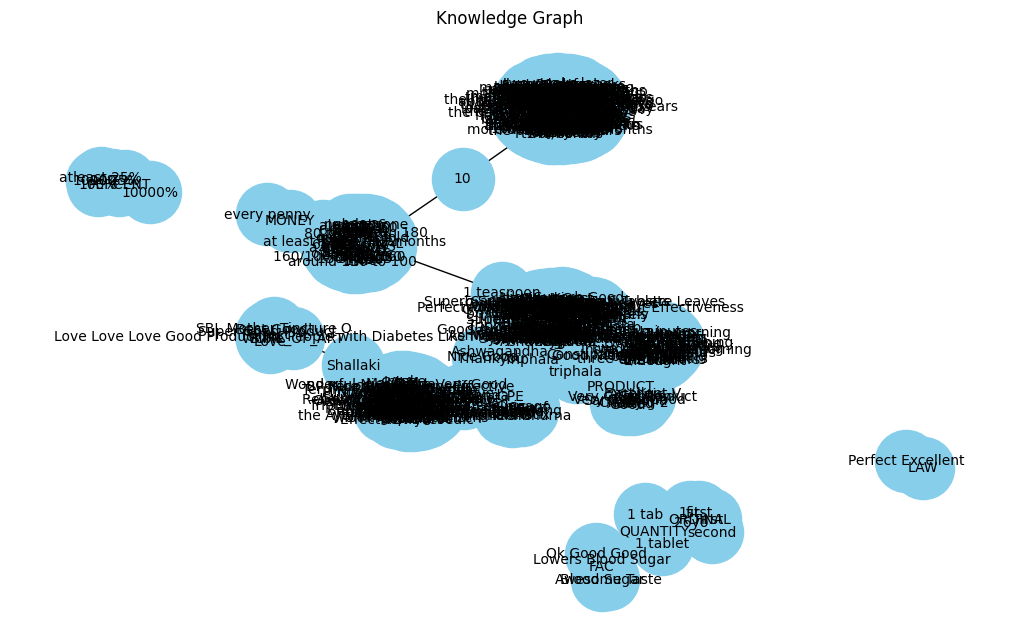

In [7]:

import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Load the CSV file
csv_file = r"C:\Users\Gurram Bhavya Reddy\Downloads\Ayurvedic_medicine_final.xlsx"
df = pd.read_excel(csv_file)
# Combine all comments into a single string
text_data = ' '.join(df['Commend'].astype(str).tolist()) 

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower()) # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word
not in stop_words]
# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
 print(f"{word}: {count}")
# Step 2: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)
print("\nNamed Entities:")
for ent in doc.ents:
 print(f"{ent.text} - {ent.label_}")
# Step 3: Derive Knowledge Graph
edges = []
for ent in doc.ents:
 edges.append((ent.text, ent.label_))
# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)
# Step 4: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000,
font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()



### Wordcloud

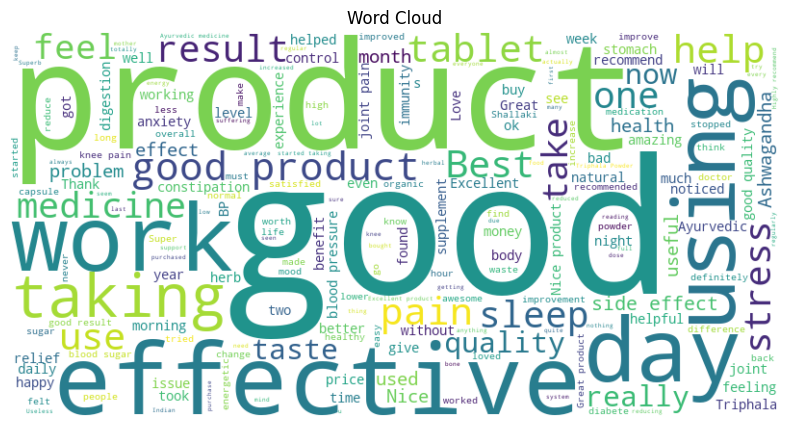

In [2]:

from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


### N-gram analysis

In [3]:

from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
 print(f"{' '.join(bigram)}: {count}")



Top 10 Bigrams:
good product: 103
product good: 54
side effects: 49
blood pressure: 37
nice product: 34
good quality: 34
good good: 28
blood sugar: 22
joint pain: 21
good effective: 19


### TF-IDF vectorization

In [4]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Commend'])
# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
    08   10  100  1000  10000  109   11  118  122  125  ...  years  yes  \
0  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
1  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
3  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
4  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   

   yesterday  yoga  young  younger  youre  youtube  yrs  äôs  
0        0.0   0.0    0.0      0.0    0.0      0.0  0.0  0.0  
1        0.0   0.0    0.0      0.0    0.0      0.0  0.0  0.0  
2        0.0   0.0    0.0      0.0    0.0      0.0  0.0  0.0  
3        0.0   0.0    0.0      0.0    0.0      0.0  0.0  0.0  
4        0.0   0.0    0.0      0.0    0.0      0.0  0.0  0.0  

[5 rows x 2356 columns]
